## New Figure 2 mockup

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
colors = colormaps.get_cmap("Set1")

In [75]:
# generate mock data for baselines
methods = [
    "Linear",
    "KNN",
    "MLP",
    "RandomForest",
    "LightGBM",
    "CatBoost",
]
method_means = [0.6, 0.5, 0.35, 0.3, 0.22, 0.2]
method_stds = [0.01] * len(methods)
rows = []
evaluations = ["default", "tuned", "tuned+ensemble"]
for method, mean, std in zip(methods, method_means, method_stds):
    for i, evaluation in enumerate(evaluations):
        for _ in range(20):
            error = np.random.normal(mean - i / 30, std)
            rows.append((method, evaluation, error))
df_scores = pd.DataFrame(rows, columns=["method", "evaluation", "normalized-error"])
df_scores.head()

,method,evaluation,normalized-error
0,Linear,default,0.599508
1,Linear,default,0.597417
2,Linear,default,0.581927
3,Linear,default,0.600112
4,Linear,default,0.600618


In [76]:
# mean value of normalized-error for autogluon best
ag_mean = 0.08

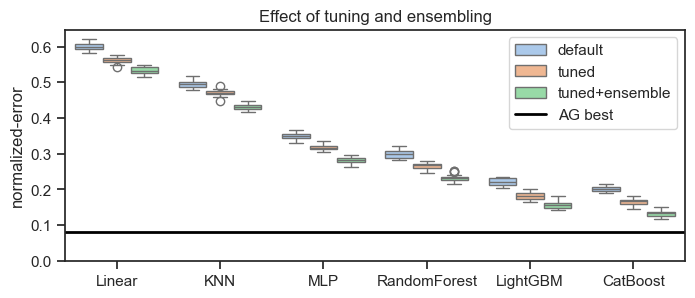

In [77]:
# boxplot
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
boxplot = sns.boxplot(x="method", y="normalized-error",
            hue="evaluation", #palette=["m", "g", "r],
            data=df_scores, ax=ax,
)
boxplot.set(xlabel=None)  # remove "Method" in the x-axis
boxplot.set_title("Effect of tuning and ensembling")
ax.axhline(y=ag_mean, label="AG best", color="black", linewidth=2.0)
ax.set_ylim([0, None])
plt.legend()